# Multiple Linear Regression Model

## Importing the required Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data 

In [2]:
data = pd.read_csv("measurements.csv")
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.0,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,13.0,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.0,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


## Cleaning The data 

**Drop alert** - Columns containing all NULL values can be dropped as they have no effect on any other parameters

In [4]:
# dropping Null values parameters
dropped_data = data.drop(['refill liters','refill gas','specials'],axis = 1)

In [5]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [6]:
dropped_data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.0,5.5,38,21.5,15,E10,0,0,0
3,13.0,3.9,36,21.5,14,E10,0,0,0
4,18.0,4.5,46,21.5,15,E10,0,0,0


##### Looking at the data it has been observed that columns or parameters have values with commas in it. These are required to be replaced by dots.

In [7]:
def delete_comma_and_convert_float(df,column_name):
    
    index = df.columns.get_loc(column_name)
    
    for i in range(len(df[column_name])):
        value = df.iloc[i,index]
        value_list = value.split(',')
        
        if len(value_list) == 2:
            new_value = float(''.join(value_list)) / 10
            df.iloc[i,index] = new_value
            
        else :
            df.iloc[i,index] = float (value)    

In [8]:
# delete_comma_and_convert_float(dropped_data, 'distance')
# dropped_data['distance'] = dropped_data['distance'].astype(float)
# delete_comma_and_convert_float(dropped_data, 'consume')
# dropped_data['consume'] = dropped_data['consume'].astype(float)

In [9]:
dropped_data['gas_type'] = dropped_data['gas_type'].map({'SP98': 1, 'E10': 0})  
# change 'gas_type' values to 1 and 0. String to int
dropped_data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.0,5.5,38,21.5,15,0,0,0,0
3,13.0,3.9,36,21.5,14,0,0,0,0
4,18.0,4.5,46,21.5,15,0,0,0,0


#### Getting the data ready

In [10]:
new_df = dropped_data[['distance','speed','temp_outside','gas_type','rain','sun','consume']]
sorted_df = new_df = new_df.sort_values('consume')
dataset_x = sorted_df.drop(['consume'],axis=1)
dataset_y = sorted_df.consume.values

## Spotting any correlation between the parameters

<AxesSubplot:>

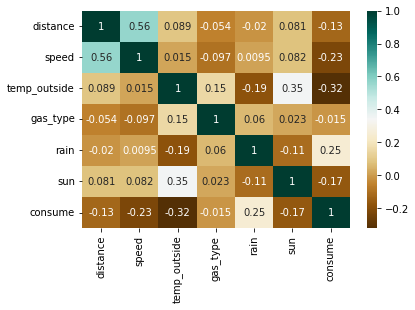

In [11]:
sns.heatmap(new_df.corr(),cmap = 'BrBG', annot=True)

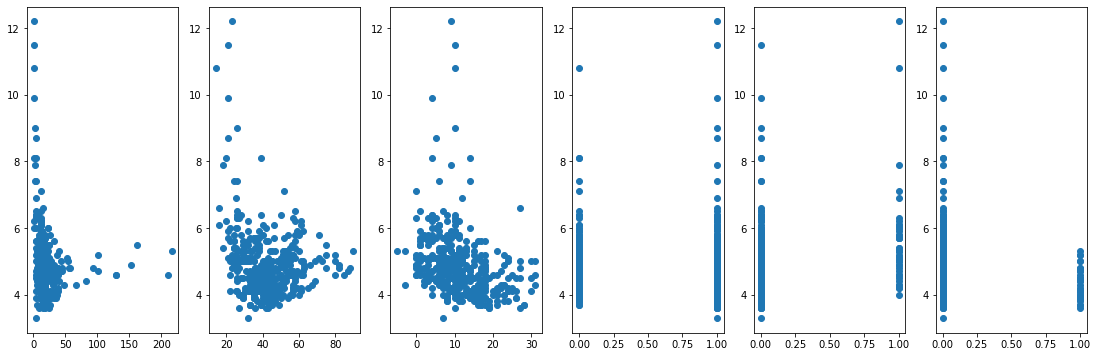

In [12]:
plt.figure(figsize=(19,6))

plt.subplot(161)
plt.scatter(dataset_x['distance'],dataset_y)
plt.subplot(162)
plt.scatter(dataset_x['speed'],dataset_y)
plt.subplot(163)
plt.scatter(dataset_x['temp_outside'],dataset_y)
plt.subplot(164)
plt.scatter(dataset_x['gas_type'],dataset_y)
plt.subplot(165)
plt.scatter(dataset_x['rain'],dataset_y)
plt.subplot(166)
plt.scatter(dataset_x['sun'],dataset_y)


plt.show()

## Creating the data model

### Splitting the data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size= 0.2, random_state= 42)

In [14]:
x_train.shape

(310, 6)

In [15]:
x_test.shape

(78, 6)

In [16]:
y_train.shape

(310,)

In [17]:
y_test.shape

(78,)

### Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
Model = LinearRegression()

In [20]:
Model.fit(x_train,y_train)

LinearRegression()

In [21]:
#To retrieve the intercept:
print(Model.intercept_)

#For retrieving the slope:
print(Model.coef_)


6.058060325156452
[ 0.00156395 -0.01885585 -0.03477121 -0.04094718  0.66095186 -0.20898915]


Predicting Values for Train dataset

In [22]:
y_pred = Model.predict(x_test)
#To predict enter values in format distance, speed,temp_outside,gas_type,rain,sun
Model.predict([[60,50,10,0,0,0]])

c:\users\kunal31\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.86139231])

In [23]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,5.1,5.976157
1,4.0,4.192052
2,4.6,4.514675
3,4.0,4.616269
4,5.9,5.987919
...,...,...
73,3.6,4.570682
74,3.8,4.738319
75,4.3,4.378626
76,4.3,5.635833


**The graph shows the actual values and the predicted values**

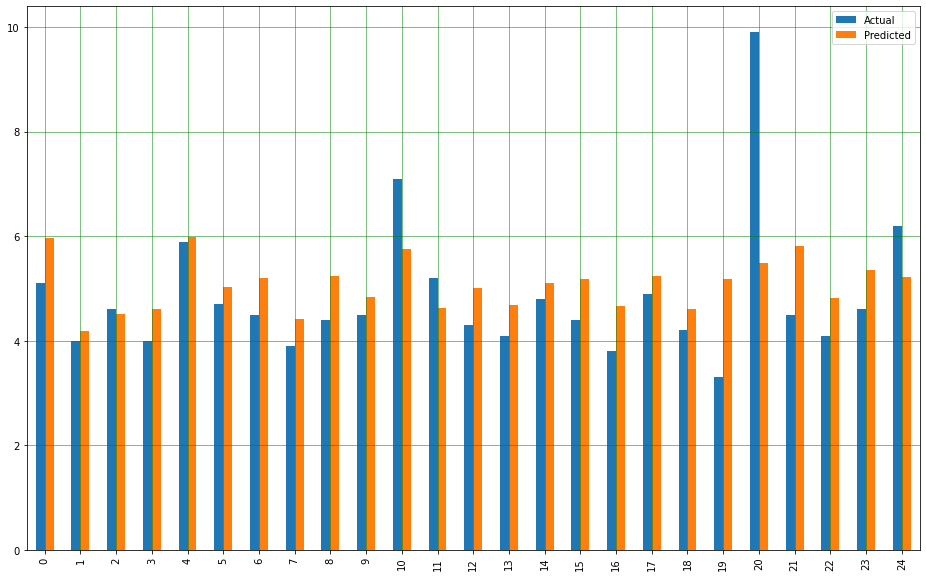

In [24]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Evaluation of the Model

In [25]:
from sklearn import metrics

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.731028097569019
Mean Squared Error: 1.2565775653674076
Root Mean Squared Error: 1.1209717058728144


**Conclusion** : The RMSE value , MAE Value and the MSE value are ranging from 0.7 to 1.3 which is quite less. This means that the model is accurate enough to make good predictions